In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
%matplotlib inline

### Problem 1.

In this lab we will use the faces94 face image dataset found at http://cswww.essex.ac.uk/mv/allfaces/faces94.html This problem will make sure that you can load and display the images from the dataset.

1. Download the faces94 dataset from the link above and extract the files. You should now have a directory named “faces94” which contains pho- tographs of 153 people, organized into folders by person.

2. The function getFaces() is given in the appendix. It constructs a set of face images by selecting exactly one face image for each person in the directory. It should return an array whose columns are flattened face images. Feel free to modify the given code. You may have to replace the parameter "./faces94" with the location of the directory faces94 on your machine.

Test this function to make sure it runs without errors. Check that the return value F is a 36000 x 153 array. The columns of this array are 153 flattened face images of 153 different people.


3. Use plt.imshow() to display one of the faces. The original image dimensions are 200x180. You may find it useful to write a helper function that accepts a flattened image and displays it.

In [2]:
def display_image(vector, orig_shape=(200,180)):
    img = vector.reshape(orig_shape)
    plt.imshow(img)

In [3]:
path = "../Data/Volume1/faces94/"
data = helper.getFaces(path)
data.shape

(36000, 153)

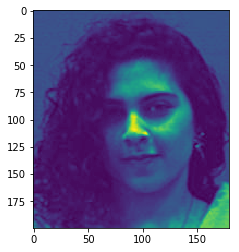

In [4]:
i = 4
display_image(data[:,i])

### Problem 2.

The facial recognition method you will write in this lab will be structured as a class. An outline of the FacialRec class is provided in the appendix. You will write the methods of the class.

When initialized, the FacialRec object first loads the face images using getFaces and stores the result. The next step is to compute the mean face.

1. In your class definition, implement the method `FacialRec.initMeanImage()`. Compute the mean face and store it as `self.mu`. This can be done in one line of code using NumPy.

2. Display the mean face. Your result should match Figure 7.1.

In [5]:
class FacialRec:
    ##########Members##########
    #   F, mu, Fbar, and U
    ###########################
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = helper.getFaces(path)
    def initMeanImage(self):
        self.mu = np.mean(self.F, axis=1)
    def initDifferences(self):
        self.Fbar = self.F - self.mu[:,None]
    def initEigenfaces(self):
        U,sig,Vh = la.svd(self.F, full_matrices=False)
        self.eigenfaces = U
    def project(self, A, s=38):
        P = np.dot(self.eigenfaces[:,:s], self.eigenfaces[:,:s].T)
        return np.dot(P, A)
    def findNearest(self, image, s=38):
        Fhat = np.dot(self.eigenfaces[:,:s].T, self.Fbar)
        ghat = np.dot(self.eigenfaces[:,:s].T, image[:,None]-self.mu[:, None])
        return np.argmin(np.linalg.norm(Fhat-ghat, axis=0))

In [6]:
facerec = FacialRec(path)

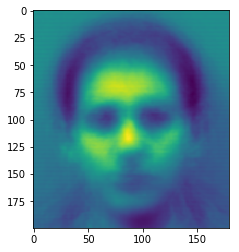

In [7]:
#display the mean face image
display_image(facerec.mu)

### Problem 3.

1. In your class definition,implement the method FacialRec.initDifferences(). Compute F ̄ and store it as self.Fbar. This can be done in one line using array broadcasting.
2. Display one of the mean-shifted faces. The output should be similar to the faces in Figure 7.2.

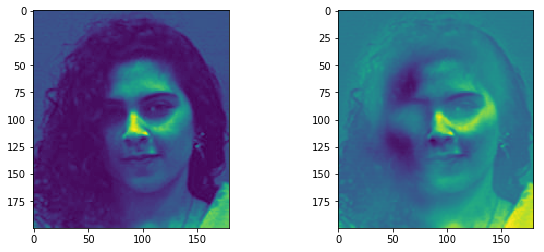

In [8]:
i = 4
plt.figure(figsize=(10,4))
plt.subplot(121)
display_image(facerec.F[:,i])
plt.subplot(122)
display_image(facerec.Fbar[:,i])

### Problem 4.

1. In your class definition, implement the method FacialRec.initEigenfaces().

    Compute the SVD (`scipy.linalg.svd()` is a good implementation to use) and store the array `U` containing the eigenfaces as its columns. Because we will only use the first few columns of U, specify the keyword parameter full_matrices=False to compute only the compact SVD.
    
2. Plot the first eigenface (i.e. the first column of U). It should resemble the first eigenface shown in Figure 7.3.

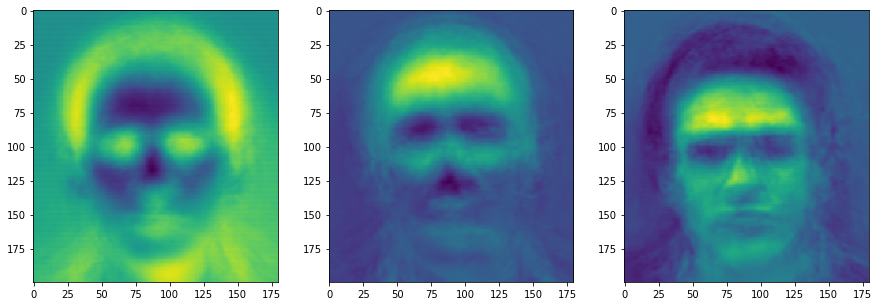

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
display_image(facerec.eigenfaces[:,0])
plt.subplot(132)
display_image(facerec.eigenfaces[:,1])
plt.subplot(133)
display_image(facerec.eigenfaces[:,2])

### Problem 5.

1. Implement the method `FacialRec.project()` in your class definition. This should accept a flattened image or an array with flattened images as its columns. It should also accept a value for `s`. The function should project the image or images into the appropriate s-dimensional subspace and change basis, then return the result.

2. Let `face` be the first mean-shifted face (the first column of `facialRec.Fbar`). Do the following:

    (a) Project `face` so that it is represented in terms of the first 19 eigenfaces.

    (b) Change basis again back to the standard basis on $R^{mn}$.

    (c) Add back the mean face `facialRec.mu`.

    (d) Plot the resulting image.
    
Your image should match Figure 7.4c.

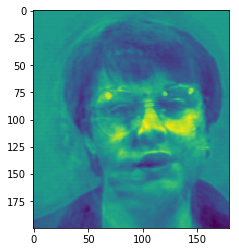

In [10]:
face = facerec.Fbar[:,0]
proj_face = facerec.project(face, s=19) #project face 
proj_face_mean = proj_face + facerec.mu #add the mean image
display_image(proj_face_mean)

### Problem 6.
1. Implement the method FacialRec.findNearest() as follows.

    The functions np.linalg.norm() and np.argmin() will be useful for the last line. When using np.linalg.norm, make sure you indicate the correct axis.

```
def findNearest(self, image, s=38):
    Fhat = # Project Fbar, producing a matrix whose columns are the f-hat defined above
    ghat = # Shift 'image' by the mean and project, producing g-hat as defined above
           # for both Fhat and ghat, use your project function from the previous problem
    
    # Return the index that minimizes ||fhat_i - ghat||_2.
``` 
2. Test your facial recognition system on faces selected randomly from the faces94 dataset. The function sampleFaces(n_tests, path) at the end of this lab will build an array of n_tests random faces from the faces94 dataset.

    Plot the random face beside the face returned by your facial recognition code to see if your system is accurately recognizing faces.

In [15]:
sample_images = helper.sampleFaces(10, path)

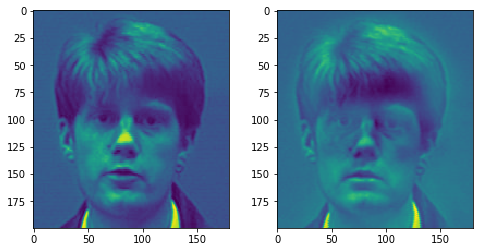

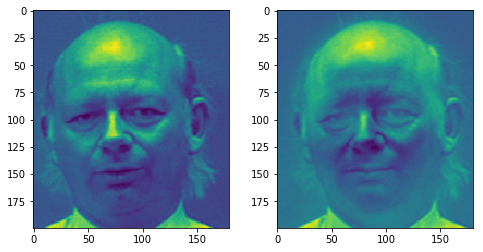

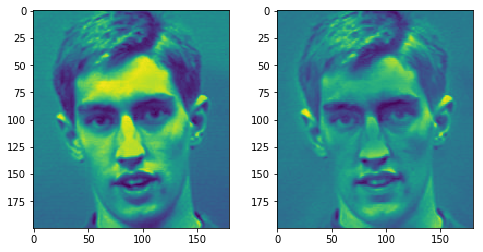

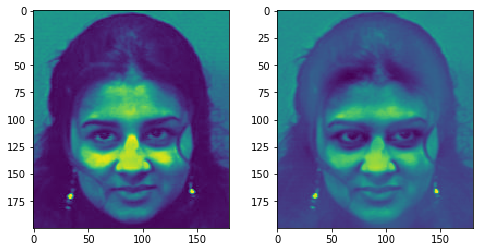

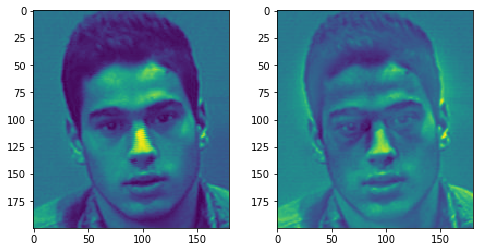

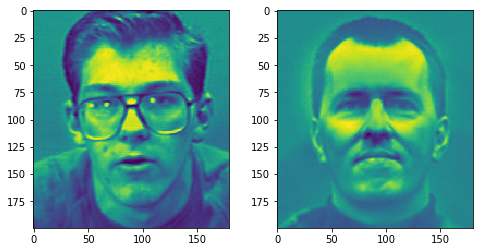

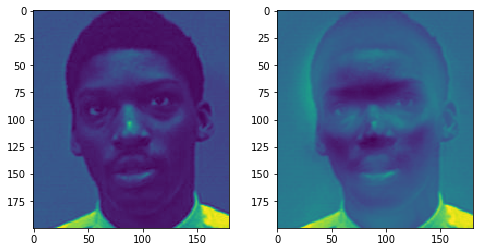

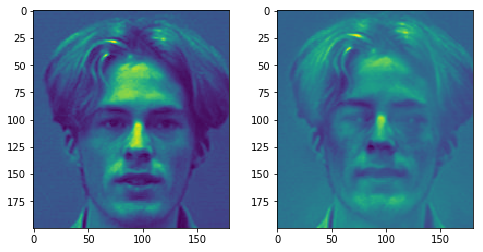

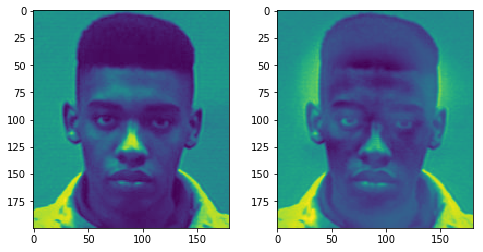

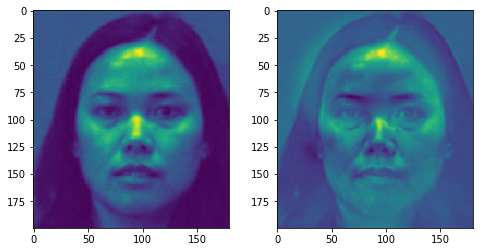

In [16]:
for img in sample_images.T:
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    display_image(img)
    plt.subplot(122)
    display_image(facerec.Fbar[:,facerec.findNearest(img, s=18)])